The numerical experiments for the Multi-Objective Simulated Annealing (MOSA) for the Thesis Seminar Timetabling Problem (TSTP).

In [1]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import time
import math
import networkx as nx
from scipy. spatial import distance
import csv
from openpyxl import Workbook

# Instance

## Real instance

In [2]:
def real_instance():
    #Students
    S = range(37)

    #Time slots
    T = range(12)
    TM = range(6)
    TA = [6,7,8,9,10,11]

    #Days
    D = range(2)

    #Parallel sessions
    P = range(5)

    #MSc_specialisation
    E = range(5)


    #a_{sdt}
    a = [[[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]], [[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0], [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]], [[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0]], [[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1]], [[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0], [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]], [[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]], [[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], [[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]], [[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]], [[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]], [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], [[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1], [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]], [[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]], [[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], [[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]], [[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]]

    #the specialisation parameters of students b_{s,e}
    b = [[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [0, 0, 1, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 0, 1], [1, 0, 0, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1], [1, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 0, 1], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [0, 0, 0, 0, 1]]


    #The minimun and maximum numbers of persentations in each half parallel sessions
    u = 0
    v = 6

    M = 15
    
    return S, T, TM, TA, D, P, E, a, b, u, v, M

## The instance generater

In [3]:
# Parameter generator for random available time

def one_day_random_instance_generator(num_students, num_specialisations, num_days, num_time_slots, seed_num):
    np.random.seed(seed_num)
    # Generate a random number with a normal distribution of students
    #num_students = int(np.random.normal(loc=stu_mean, scale=2))
    

    # Generate specialisations
    E = range(num_specialisations)

    # Generate a random assignment of students' majors
    student_specialisations = np.random.choice(E, size=num_students)

    # The list of students' specialisations
    student_lists = []
    for e in E:
        student_list = [1 if m == e else 0 for m in student_specialisations]
        student_lists.append(student_list)
    #b_{se}
    b = np.vstack(student_lists).T.tolist()


    # Defines the number of time slots and the total number of time slots per day
    num_time_slots_per_day = num_time_slots
    total_time_slots = num_days * num_time_slots_per_day

    # Generate a list of available time of students
    student_time_tables = []
    for _ in range(num_students):
        # Generate a random free schedule, where 0 means no free and 1 means free
        time_table = np.random.choice([0, 1], size=total_time_slots)
        
        # Split each day's time list into days
        student_time_table = []
        for i in range(num_days):
            student_time_table.append(time_table[i:i+num_time_slots_per_day].tolist())
    
        student_time_tables.append(student_time_table)
        
        a = student_time_tables

    return a, b


# The parameter generator considering the correlation of the two days

def two_days_instance_generator(num_students, num_specialisations, num_time_slots,seed_num):
    num_days = 2
    np.random.seed(seed_num)
    
    # Generate specialisations
    E = range(num_specialisations)

    # Generate a random assignment of students' majors
    student_specialisations = np.random.choice(E, size=num_students)

    # The list of students' specialisations
    student_lists = []
    for e in E:
        student_list = [1 if m == e else 0 for m in student_specialisations]
        student_lists.append(student_list)
    
    # b_{se}
    b = np.vstack(student_lists).T.tolist()

    # Defines the number of time slots and the total number of time slots per day
    num_time_slots_per_day = num_time_slots
    total_time_slots = num_days * num_time_slots_per_day

    # Generate a list of available time of students
    student_time_tables = []

    for i in range(num_students):
        # Generate a random free schedule, where 0 means no free and 1 means free
        time_table = np.random.choice([0, 1], size=total_time_slots)

        # Set the schedule for the first and last quarters of students as specified
        if i < num_students // 4:
            time_table[:num_time_slots_per_day] = 0  # 25% with all zeros on the first day
        elif i >= (num_students // 4) * 3:
            time_table[num_time_slots_per_day:] = 0  # 25% with all zeros on the second day

        # Split each day's time list into days
        student_time_table = [time_table[j:j + num_time_slots_per_day].tolist() for j in range(0, total_time_slots, num_time_slots_per_day)]

        student_time_tables.append(student_time_table)

    a = student_time_tables

    return a, b


# The function to generate random instance group in the same size

def one_day_instance_group(num_students, num_specialisations, num_days, num_time_slots, n):
    instance_group_list = []
    for i in range(n):
        seed_num = 42 + i
        instance_group_list.append(one_day_random_instance_generator(num_students, num_specialisations, num_days, num_time_slots,seed_num))
    return instance_group_list

def two_day_instance_group(num_students, num_specialisations, num_days, num_time_slots, n, seed1):
    instance_group_list = []
    for i in range(n):
        seed_num = seed1 + i
        instance_group_list.append(two_days_instance_generator(num_students, num_specialisations, num_time_slots,seed_num))
    return instance_group_list

In [4]:
# art01-art10
art0 = one_day_instance_group(num_students = 20, num_specialisations = 3, num_days = 1, num_time_slots = 12, n = 10)

# art11-art20
art1 = two_day_instance_group(num_students = 30, num_specialisations = 5, num_days = 2, num_time_slots = 12, n = 10, seed1 = 10)

# art21-art25
art2 = two_day_instance_group(num_students = 60, num_specialisations = 5, num_days = 2, num_time_slots = 12, n = 5, seed1 = 20)

In [5]:
# The function to count the number of zeros

def count_zeros_between_ones(sequence):
    if not 1 in sequence:
        return 0
    
    first_one_index = sequence.index(1)
    last_one_index = len(sequence) - 1 - sequence[::-1].index(1)

    zeros_between_ones = 0
    zero_count = 0

    for i, num in enumerate(sequence):
        if num == 0:
            zero_count += 1
            if first_one_index < i < last_one_index:
                zeros_between_ones += 1
    
    return zeros_between_ones


# Multi-Objective Simulated Annealing

## Objective functions

In [6]:
# Objective Functions Definitions (f1 to f5)

def F_1(A):
    num_subp = round(len(A) / 6)
    result = 0
    for i in range(num_subp):
        for j in range(i * 6, i * 6 + 5):
            if A[j] == 0 and A[j + 1] != 0:
                result += 1
            elif A[j] != 0 and A[j + 1] == 0:
                result += 1
    return result

def F_2(A, b, E):
    result = 0
    num_subp = round(len(A) / 6)

    def find_sp(i, sp):
        for e in range(len(E)):
            if A[i] != 0:
                if b[A[i] - 1][e] == 1 and e not in sp:
                    return e
        return None

    indices_list = [{i for i in range(j * 6, j * 6 + 6)} for j in range(num_subp)]

    for indices in indices_list:
        sp = []
        for i in indices:
            value = find_sp(i, sp)
            if value is not None:
                sp.append(value)
        result += len(sp)

    return result

def F_3(A, b, E):
    result = 0
    num_subp = round(len(A) / 6)

    def find_sp_swich(i):
        for e in range(len(E)):
            if A[i] != 0 and i + 1 < len(A) and A[i + 1] != 0:
                if b[A[i] - 1][e] != b[A[i + 1] - 1][e]:
                    return 2
            elif A[i] != 0 and (i + 1 >= len(A) or A[i + 1] == 0):
                return 1
            elif A[i] == 0 and i + 1 < len(A) and A[i + 1] != 0:
                return 1
        return 0

    indices_list = [{i for i in range(j * 6, j * 6 + 5)} for j in range(num_subp)]

    for indices in indices_list:
        for i in indices:
            value = find_sp_swich(i)
            result += value

    return result

def F_4(A, a, P):
    def count_unassign(A, day_list,a):
        count = 0
        for i in range(len(day_list)):
            d = day_list[i]
            for j in range(i * 12, i * 12 + 12):
                t = j - i * 12
                if A[j] != 0:
                    if a[A[j] - 1][d][t] == 0:
                        count += 1
        return count

    if len(P) == 3:
        day_lists = [[0, 0, 0]]
    elif len(P) == 4:
        day_lists = [[ 0, 0, 0, 0], [ 0, 0, 0, 1], [ 0, 0, 1, 1], [ 0, 1, 1, 1], [ 1, 1, 1, 1]]
    elif len(P) == 5:
        day_lists = [[ 0, 0, 0, 0, 0], [ 0, 0, 0, 0, 1], [ 0, 0, 0, 1, 1], [  0,0, 1, 1, 1], [ 0, 1, 1, 1, 1],[ 1, 1, 1, 1, 1]]
    elif len(P) == 6:
        day_lists = [[ 0, 0, 0, 0, 0, 0], [ 0, 0, 0, 0, 0, 1], [ 0, 0, 0, 0, 1, 1], [0, 0, 0, 1, 1, 1], [ 0, 0, 1, 1, 1, 1], [ 0, 1, 1, 1, 1, 1], [ 1, 1, 1, 1, 1, 1]]
        
   
    result = float('inf')
    day_assign = []

    for day_list in day_lists:
        unassign = count_unassign(A, day_list,a)
        if result > unassign:
            result = unassign
            day_assign = day_list

    return result, day_assign

def F_5(A):
    num_p = round(len(A) / 12)
    num_selected_p = num_p
    for i in range(num_p):
        result = 0
        for j in range(i * 12, i * 12 + 12):
            if A[j] == 0:
                result += 1
        if result == 12:
            num_selected_p -= 1
    return num_selected_p


objectives = [F_1, lambda sol: F_2(sol, b, E), lambda sol: F_3(sol, b, E), lambda sol: F_4(sol, a, P), F_5]



# Lunch Break Function
def lunch_break(A):
    num_p = round(len(A) / 12)
    count = 0
    for i in range(num_p):
        noon = i * 12 + 5
        if not (A[noon] == 0 or A[noon + 1] == 0):
            count = count + 1
    if count == 0:
        return True
    else:
        return False

### Find non-dominated solution

In [7]:
def is_dominated(current_sol, solutions, objectives):
    F = [F_1(current_sol), F_2(current_sol, b, E), F_3(current_sol, b, E), F_4(current_sol, a, P)[0], F_5(current_sol)]
    
    for sol in solutions:
        F_sol = [F_1(sol), F_2(sol, b, E), F_3(sol, b, E), F_4(sol, a, P)[0], F_5(sol)]
        if all(F_sol[i] <= F[i] for i in range(len(F))) and any(F_sol[i] < F[i] for i in range(len(F))):
            return True
    return False

def find_non_dominated(solutions):
    pareto_solutions = []
    for sol in solutions:
        if not is_dominated(sol, [p for p in pareto_solutions], objectives):
            pareto_solutions.append(sol)
            pareto_solutions = [p for p in pareto_solutions if not is_dominated(p, [sol], objectives)]
    return pareto_solutions
    

## Aggregated functions

In [8]:
def aggregating_function_weightedsum(current_sol,a,b,E,P,ideal):
    w = [0.09841,0.02784,0.31226,0.55201,0.00948]
    cost = w[0] * F_1(current_sol) + w[1] * F_2(current_sol, b,E) + w[2] * F_3(current_sol, b,E) + w[3] * F_4(current_sol, a,P)[0] + w[4] * F_5(current_sol)
    return cost

def aggregating_function_distance(current_sol,a,b,E,P,ideal):
    CF = [F_1(current_sol), F_2(current_sol, b,E), F_3(current_sol, b,E), F_4(current_sol, a,P)[0], F_5(current_sol)]
    #ideal = [3, 8, 4, 0, 4]
    vector = [a - b for a, b in zip(CF, ideal)]
    np.linalg.norm(vector)
    cost = np.linalg.norm(vector)
    return cost

def aggregating_function_weighted_infinite_norm(current_sol, a, b,E,P, ideal):
    F = [F_1(current_sol), F_2(current_sol, b,E), F_3(current_sol, b,E), F_4(current_sol, a,P)[0], F_5(current_sol)]
    #ideal = [3, 8, 4, 0, 4]
    weights = [2, 1, 2, 5, 1]  # Example weights for each criterion

    # Compute the weighted absolute deviations
    weighted_deviations = [weights[i] * abs(F[i] - ideal[i]) for i in range(len(F))]

    # Find the maximum weighted deviation
    cost = max(weighted_deviations)
    return cost



aggregating_functions = [aggregating_function_weightedsum, aggregating_function_weighted_infinite_norm, aggregating_function_distance]

## Initial permutation

In [9]:
def random_permutation(S, P,seed):
    
    random.seed(seed)
    
    total_length = len(P) * 12
    num_p = len(P)
    
    # Initialize a list of all numbers that need to appear exactly once
    available_numbers = list(range(1, len(S) + 1))
    random.shuffle(available_numbers)
    
    random_list = []
    current_index = 0  # To track the position in available_numbers
    
    for i in range(num_p):
        shift = [0] * 12  # Initialize shift with 0s
        for j in range(12):
            if j == 5 or j == 6:  # Ensure lunch break
                shift[j] = 0
            elif current_index < len(available_numbers):
                shift[j] = available_numbers[current_index]
                current_index += 1
        random_list.extend(shift)
    
    # If the list length is less than total_length, fill the rest with 0
    if len(random_list) < total_length:
        random_list.extend([0] * (total_length - len(random_list)))

    return random_list

## Neighborhood functions

In [10]:
# Swap 1 and Find Neighbor Functions
def swap_elements_1(sequence, i, j):
    new_sequence = sequence.copy()
    new_sequence[i], new_sequence[j] = new_sequence[j], new_sequence[i]
    return new_sequence

def find_neighbor_swap_1(permutation):
    random_numbers = random.sample(range(len(permutation)), 2)
    neighbor_permutation = swap_elements_1(permutation, random_numbers[0], random_numbers[1])
    return neighbor_permutation
    


## Approximate ideal points

In [11]:
def Approximate_ideal(a, b,E,P, permutation_initial, max_iterations, initial_temperature, cooling_rate, m, seed):
    start_time = time.time()
    # Simulated Annealing Algorithm
    def weightedsum(current_sol,a,b,E,P,w):
        cost = w[0] * F_1(current_sol) + w[1] * F_2(current_sol, b,E) + w[2] * F_3(current_sol, b,E) + w[3] * F_4(current_sol, a,P)[0] + w[4] * F_5(current_sol)
        return cost
    def Simulated_Annealing_TSTP(a, b,E,P, permutation_initial, max_iterations, initial_temperature, cooling_rate, m, seed,w):

        random.seed(seed)
        np.random.seed(seed)

        start_time = time.time()

        sol_list = []
        current_sol = permutation_initial
        sol_list.append(current_sol)
        temperature = initial_temperature
        i = 0

        n = max_iterations // m

        while i <= n:
            for j in range(m):
                while True:
                    neighbor_sol = find_neighbor_swap_1(current_sol)
                    if lunch_break(neighbor_sol):
                        break

                delta = weightedsum(neighbor_sol,a,b,E,P,w) - weightedsum(current_sol,a,b,E,P,w)

                if delta <= 0:
                    current_sol = neighbor_sol

                else:
                    acceptance_probability = math.exp(- delta / temperature)
                    if random.uniform(0, 1) < acceptance_probability:
                        current_sol = neighbor_sol

                sol_list.append(current_sol)


            i = i + 1

            temperature *= cooling_rate

        end_time = time.time()  
        running_time = end_time - start_time 

        return current_sol
            
    ws = [[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]]
    
    f1 = F_1(Simulated_Annealing_TSTP(a, b,E,P, permutation_initial, max_iterations, initial_temperature, cooling_rate, m, seed,ws[0]))
    f2 = F_2(Simulated_Annealing_TSTP(a, b,E,P, permutation_initial, max_iterations, initial_temperature, cooling_rate, m, seed,ws[1]),b,E)
    f3 = F_3(Simulated_Annealing_TSTP(a, b,E,P, permutation_initial, max_iterations, initial_temperature, cooling_rate, m, seed,ws[2]),b,E)
    f4 = F_4(Simulated_Annealing_TSTP(a, b,E,P, permutation_initial, max_iterations, initial_temperature, cooling_rate, m, seed,ws[3]),a,P)[0]
    f5 = F_5(Simulated_Annealing_TSTP(a, b,E,P, permutation_initial, max_iterations, initial_temperature, cooling_rate, m, seed,ws[4]))
    
    end_time = time.time()  
    running_time = end_time - start_time 
    
    return f1,f2,f3,f4,f5,running_time
    


## MOSA function

In [12]:
# Simulated Annealing Algorithm
def Simulated_Annealing_TSTP(aggregating_function, find_neighbor, a, b,E,P, permutation_initial, max_iterations, initial_temperature, cooling_rate, m, seed, ideal):
    
    random.seed(seed)
    np.random.seed(seed)
    
    start_time = time.time()
    
    sol_list = []
    current_sol = permutation_initial
    sol_list.append(current_sol)
    temperature = initial_temperature
    i = 0
    
    n = max_iterations // m
    
    
    while i <= n:
        for j in range(m):
            while True:
                neighbor_sol = find_neighbor(current_sol)
                if lunch_break(neighbor_sol):
                    break
            
            delta = aggregating_function(neighbor_sol,a,b,E,P,ideal) - aggregating_function(current_sol,a,b,E,P,ideal)
            
            if delta <= 0:
                current_sol = neighbor_sol

            else:
                acceptance_probability = math.exp(- delta / temperature)
                if random.uniform(0, 1) < acceptance_probability:
                    current_sol = neighbor_sol
            
            sol_list.append(current_sol)
                    
            
        i = i + 1

        temperature *= cooling_rate

    end_time = time.time()  
    running_time = end_time - start_time 

    return current_sol, sol_list, running_time  

# Experiment

## Experiment function

In [13]:
def run_SA_multiple_times(aggregating_function, find_neighbor, objectives, a, b,E,P, permutation_initial, max_iterations, initial_temperature, cooling_rate, m, n_runs):
    costs_weightedsum = []
    costs_distance = []
    running_times = []
    all_solutions = []

    seeds = range(42, 42 + n_runs) 

    
    min_cost_solution = None
    min_cost_value = float('inf')
    min_cost_seed = None
    min_cost_objective_values = []
    
    # ideal point
    f1,f2,f3,f4,f5,ideal_time = Approximate_ideal(a, b,E,P, permutation_initial, max_iterations, initial_temperature, cooling_rate, m, seed=42)
    ideal = [f1,f2,f3,f4,f5]
    print("The ideal point:", ideal)
    print("The running time of ideal point approximation:", ideal_time)


    for i in range(n_runs):
        seed = seeds[i]
        
        best_solution, sol_list, running_time = Simulated_Annealing_TSTP(aggregating_function, find_neighbor, a, b,E,P, permutation_initial, max_iterations, initial_temperature, cooling_rate, m, seed,ideal)
        all_solutions.append((best_solution, seed))  
        
        final_cost = aggregating_function(best_solution, a, b,E,P,ideal)
        final_cost_weightedsum = aggregating_function_weightedsum(best_solution, a, b,E,P,ideal)
        final_cost_distance = aggregating_function_distance(best_solution, a, b,E,P,ideal)
        costs_weightedsum.append(final_cost_weightedsum)
        costs_distance.append(final_cost_distance)
        running_times.append(running_time)
        

        if final_cost < min_cost_value:
            min_cost_value = final_cost
            min_cost_solution = best_solution
            min_cost_seed = seed
            
            min_cost_objective_values = [obj(best_solution) for obj in objectives]
   
   
    pareto_solutions = []
    pareto_seeds = []
    for sol, seed in all_solutions:
        if not is_dominated(sol, [p for p, _ in pareto_solutions], objectives):
            pareto_solutions.append((sol, seed))
            pareto_solutions = [(p, s) for p, s in pareto_solutions if not is_dominated(p, [sol], objectives)]
    
   
    pareto_values = [[obj(sol) for obj in objectives] for sol, seed in pareto_solutions]
    pareto_seeds = [seed for sol, seed in pareto_solutions]  
    

    # Statistics for costs_weightedsum
    max_cost_weightedsum = round(np.max(costs_weightedsum), 2)
    min_cost_weightedsum = round(np.min(costs_weightedsum), 2)
    avg_cost_weightedsum = round(np.mean(costs_weightedsum), 2)
    median_cost_weightedsum = round(np.median(costs_weightedsum), 2)
    q1_cost_weightedsum = round(np.percentile(costs_weightedsum, 25), 2)  # First quartile
    q3_cost_weightedsum = round(np.percentile(costs_weightedsum, 75), 2)  # Third quartile

    # Statistics for costs_distance
    max_cost_distance = round(np.max(costs_distance), 2)
    min_cost_distance = round(np.min(costs_distance), 2)
    avg_cost_distance = round(np.mean(costs_distance), 2)
    median_cost_distance = round(np.median(costs_distance), 2)
    q1_cost_distance = round(np.percentile(costs_distance, 25), 2)  # First quartile
    q3_cost_distance = round(np.percentile(costs_distance, 75), 2)  # Third quartile

    # Statistics for running times
    max_time = round(np.max(running_times), 2)
    min_time = round(np.min(running_times), 2)
    avg_time = round(np.mean(running_times), 2)
    median_time = round(np.median(running_times), 2)
    q1_time = round(np.percentile(running_times, 25), 2)  # First quartile
    q3_time = round(np.percentile(running_times, 75), 2)  # Third quartile

    return {
        "Cost_weightedsum Stats": {
            "Max": max_cost_weightedsum, "Min": min_cost_weightedsum, 
            "Average": avg_cost_weightedsum, "Median": median_cost_weightedsum,
            "Q1": q1_cost_weightedsum, "Q3": q3_cost_weightedsum
        },
        "Cost_distance Stats": {
            "Max": max_cost_distance, "Min": min_cost_distance, 
            "Average": avg_cost_distance, "Median": median_cost_distance,
            "Q1": q1_cost_distance, "Q3": q3_cost_distance
        },
        "Running Time Stats": {
            "Max": max_time, "Min": min_time, 
            "Average": avg_time, "Median": median_time,
            "Q1": q1_time, "Q3": q3_time
        },
        "pareto values": pareto_values
    }

## Generate timetable

In [35]:
def generate_timetable(schedule, b, E, P, num_sessions_per_day=12):
    count = 0
    num_parallel_sessions = len(P)
    day_assign = F_4(schedule,a,P)[1]
    print ("Day", day_assign[0]+1, "Session 1")
    print("==================================================\n")
    
    for s in schedule:
        student_e = 0
        if s != 0:
            
            for e in range(5):
                if b[s-1][e] == 1:
                    stuent_e = e
            print("Student", s, "Specialization", E[stuent_e]+1 )
        else:
            print("No allocation")
        count = count + 1
        
        if count % 12 == 0:
            ss = count // 12 -1
            if ss < num_parallel_sessions-1:
                print("==================================================\n")
                print("Day", day_assign[ss+1]+1, "Session", ss+2)
                print("==================================================\n")
            
        
#generate_timetable(SimulatedAnnealing_solution, b, num_parallel_sessions=4, num_sessions_per_day=12)      
        
        

## Plot

In [2]:
# Assuming result_list is already defined or generated
def plot_result_list(sol_list,aggregating_function,a,b,E,P,ideal):
    result_list = []
    for i in range(len(sol_list)):
        result_list.append(aggregating_function(sol_list[i],a,b,E,P,ideal))
    
    plt.figure(figsize=(10, 5))
    plt.plot(result_list,  linestyle='-', color='b')
    #marker='x',
    plt.title('Plot of Result List')
    plt.xlabel('Number of iterations')
    plt.ylabel('Value of aggregating function')
    plt.grid(True)
    plt.show()
    
    


## Parameter tuning

### Hammersley point set

In [16]:
def hammersley_point_set(num_points, dimensions):
    """ Generate a Hammersley set for 'num_points' points in 'dimensions' dimensions. """
    primes = [2, 3, 5]  # Extend this list based on your dimensions needs
    sequence = np.empty((num_points, dimensions))
    for j in range(dimensions):
        for i in range(num_points):
            n = i + 1
            f = 1
            x = 0
            while n > 0:
                n, mod = divmod(n, primes[j])
                f = f / primes[j]
                x += mod * f
            sequence[i, j] = x
    return sequence

def scale_points(points, ranges):
    """ Scale points to the given range in each dimension """
    min_vals = np.array([r[0] for r in ranges])
    max_vals = np.array([r[1] for r in ranges])
    scaled_points = min_vals + points * (max_vals - min_vals)
    # Round the scaled points to the nearest integer
    return np.rint(scaled_points).astype(int)

# Parameters settings
num_points = 10
dimensions = 3
param_ranges = [
    (500, 1000),   # t0 range
    (0, 20),       # m range
    (30000, 60000) # max iterations range
]

# Generate Hammersley points
points = hammersley_point_set(num_points, dimensions)
scaled_points = scale_points(points, param_ranges)

# Convert to DataFrame
df_hammersley_point = pd.DataFrame(scaled_points, columns=['Initial Temperature t0', 'Iterations per Temp m', 'Max Iterations'])

# Write to Excel
output_excel_path = 'hammersley_points.xlsx'
df_hammersley_point.to_excel(output_excel_path, index=False)

print(f"Data written successfully to {output_excel_path}")

Data written successfully to hammersley_points.xlsx


In [18]:
def test_SA_multiple_times(aggregating_function, find_neighbor, objectives, a, b,E,P, permutation_initial, max_iterations, initial_temperature, cooling_rate, m, n_runs):
    costs_distance = []
    running_times = []
    all_solutions = []
    #num_non_dominated = []
    seeds = range(42, 42 + n_runs)  # 从42开始的n个连续种子
    f1,f2,f3,f4,f5,running_time = Approximate_ideal(a, b,E,P, permutation_initial, max_iterations, initial_temperature, cooling_rate, m, seed=42)
    ideal = [f1,f2,f3,f4,f5]



    for i in range(n_runs):
        seed = seeds[i]
        
        best_solution, sol_list, running_time = Simulated_Annealing_TSTP(aggregating_function, find_neighbor, a, b,E,P, permutation_initial, max_iterations, initial_temperature, cooling_rate, m, seed,ideal)
        all_solutions.append((best_solution, seed))  
        CF = [F_1(best_solution), F_2(best_solution, b,E), F_3(best_solution, b,E), F_4(best_solution, a,P)[0], F_5(best_solution)]
        print(CF)
        
        final_distance = aggregating_function_distance(best_solution, a, b,E,P,ideal)
        running_times.append(running_time)
        costs_distance.append(final_distance)
        avg_distance = round(np.mean(costs_distance), 2)

    return avg_distance

Parameter tuning process has been omitted for brevity.
The final optimized parameters are applied here directly.


In [21]:
best_point = [625, 10, 40000]

# Numerical experiment

## real instance

In [24]:
S, T, TM, TA, D, P, E, a, b, u, v, M = real_instance()
real_result = {}
max_iterations = best_point[2]
initial_temperature = best_point[0]
cooling_rate = 0.99
m = best_point[1]
n_runs = 10

aggregating_function_list = [aggregating_function_weightedsum, aggregating_function_distance]
permutation_initial_1 = random_permutation(S,P,42)
permutation_initial_2 = random_permutation(S,P,43)
permutation_initial_list = [permutation_initial_1,permutation_initial_2]
find_neighbor = find_neighbor_swap_1

for aggregating_function in aggregating_function_list:
    for permutation_initial in permutation_initial_list:
        result_dic = run_SA_multiple_times(aggregating_function, find_neighbor, objectives, a, b,E,P, permutation_initial, max_iterations, initial_temperature, cooling_rate, m, n_runs)
        real_result[(aggregating_function, tuple(permutation_initial))] = result_dic

print(real_result)



The ideal point: [2, 8, 6, 0, 5]
The running time of ideal point approximation: 90.78695344924927
The ideal point: [2, 9, 6, 0, 5]
The running time of ideal point approximation: 89.00221800804138
The ideal point: [2, 8, 6, 0, 5]
The running time of ideal point approximation: 105.15278220176697
The ideal point: [2, 9, 6, 0, 5]
The running time of ideal point approximation: 116.49684619903564
{(<function aggregating_function_weightedsum at 0x000001E998978900>, (6, 21, 13, 10, 23, 0, 0, 27, 28, 5, 25, 30, 34, 32, 33, 11, 12, 0, 0, 20, 29, 17, 37, 7, 26, 1, 36, 14, 19, 0, 0, 3, 35, 31, 22, 4, 24, 9, 15, 16, 18, 0, 0, 2, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)): {'Cost_weightedsum Stats': {'Max': 7.17, 'Min': 4.32, 'Average': 5.33, 'Median': 5.26, 'Q1': 5.0, 'Q3': 5.46}, 'Cost_distance Stats': {'Max': 9.95, 'Min': 4.0, 'Average': 7.08, 'Median': 7.12, 'Q1': 5.87, 'Q3': 8.2}, 'Running Time Stats': {'Max': 20.38, 'Min': 18.59, 'Average': 19.19, 'Median': 18.9, 'Q1': 18.79, 'Q3': 19.27

In [25]:
S, T, TM, TA, D, P, E, a, b, u, v, M = real_instance()
real_result = {}
max_iterations = 20000
initial_temperature = 100
cooling_rate = 0.99
m = 5
n_runs = 1

aggregating_function_list = [aggregating_function_weightedsum, aggregating_function_distance]
permutation_initial_1 = random_permutation(S,P,42)
permutation_initial_2 = random_permutation(S,P,43)
permutation_initial_list = [permutation_initial_1,permutation_initial_2]
find_neighbor = find_neighbor_swap_1

for aggregating_function in aggregating_function_list:
    for permutation_initial in permutation_initial_list:
        result_dic = run_SA_multiple_times(aggregating_function, find_neighbor, objectives, a, b,E,P, permutation_initial, max_iterations, initial_temperature, cooling_rate, m, n_runs)
        real_result[(aggregating_function,tuple(permutation_initial))] = result_dic

print(real_result)

The ideal point: [2, 9, 6, 0, 5]
The running time of ideal point approximation: 47.38519477844238
The ideal point: [2, 9, 4, 0, 5]
The running time of ideal point approximation: 46.53071117401123
The ideal point: [2, 9, 6, 0, 5]
The running time of ideal point approximation: 47.35036754608154
The ideal point: [2, 9, 4, 0, 5]
The running time of ideal point approximation: 47.0869836807251
{(<function aggregating_function_weightedsum at 0x000001A3F4F832E0>, (6, 21, 13, 10, 23, 0, 0, 27, 28, 5, 25, 30, 34, 32, 33, 11, 12, 0, 0, 20, 29, 17, 37, 7, 26, 1, 36, 14, 19, 0, 0, 3, 35, 31, 22, 4, 24, 9, 15, 16, 18, 0, 0, 2, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)): {'Cost_weightedsum Stats': {'Max': 5.94, 'Min': 5.94, 'Average': 5.94, 'Median': 5.94, 'Q1': 5.94, 'Q3': 5.94}, 'Cost_distance Stats': {'Max': 6.86, 'Min': 6.86, 'Average': 6.86, 'Median': 6.86, 'Q1': 6.86, 'Q3': 6.86}, 'Running Time Stats': {'Max': 10.2, 'Min': 10.2, 'Average': 10.2, 'Median': 10.2, 'Q1': 10.2, 'Q3': 10.2}, 'p

## art01-art10

In [25]:
for j in range(len(art0)):
    a = art0[j][0]
    b = art0[j][1]
    # 小规模实例
    S = range(20)
    T = range(12)
    TM = range(6)
    TA = [6, 7, 8, 9, 10, 11]
    D = range(1)
    P = range(3)
    E = range(3)
    u = 0
    v = 6
    M = 15
    art0_result = {}
    max_iterations = best_point[2]
    initial_temperature = best_point[0]
    cooling_rate = 0.99
    m = best_point[1]
    n_runs = 10

    aggregating_function_list = [aggregating_function_weightedsum, aggregating_function_distance]
    permutation_initial_1 = random_permutation(S,P,42)
    permutation_initial_2 = random_permutation(S,P,43)
    permutation_initial_list = [permutation_initial_1,permutation_initial_2]
    find_neighbor = find_neighbor_swap_1

    for aggregating_function in aggregating_function_list:
        for permutation_initial in permutation_initial_list:
            result_dic = run_SA_multiple_times(aggregating_function, find_neighbor, objectives, a, b,E,P, permutation_initial, max_iterations, initial_temperature, cooling_rate, m, n_runs)
            art0_result[(j,aggregating_function,tuple(permutation_initial))] = result_dic

    print(art0_result)



The ideal point: [2, 4, 2, 0, 3]
The running time of ideal point approximation: 52.75212287902832
The ideal point: [2, 4, 2, 0, 3]
The running time of ideal point approximation: 52.28178787231445
The ideal point: [2, 4, 2, 0, 3]
The running time of ideal point approximation: 52.72077488899231
The ideal point: [2, 4, 2, 0, 3]
The running time of ideal point approximation: 55.50177049636841
{(0, <function aggregating_function_weightedsum at 0x000001E998978900>, (20, 6, 15, 5, 10, 0, 0, 14, 16, 19, 7, 13, 18, 11, 2, 12, 3, 0, 0, 17, 8, 9, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)): {'Cost_weightedsum Stats': {'Max': 2.17, 'Min': 0.96, 'Average': 1.61, 'Median': 1.61, 'Q1': 1.61, 'Q3': 1.76}, 'Cost_distance Stats': {'Max': 3.74, 'Min': 0.0, 'Average': 2.21, 'Median': 2.24, 'Q1': 2.24, 'Q3': 2.4}, 'Running Time Stats': {'Max': 10.8, 'Min': 9.86, 'Average': 10.18, 'Median': 10.06, 'Q1': 10.01, 'Q3': 10.17}, 'pareto values': [[2, 4, 2, (0, [0, 0, 0]), 3], [1, 5, 3, (0, [0, 0, 0]), 3]]}, (0, <

## art11-art20

In [26]:
for j in range(len(art1)):
    a = art1[j][0]
    b = art1[j][1]
   
    S = range(30)
    T = range(12)
    TM = range(6)
    TA = [6, 7, 8, 9, 10, 11]
    D = range(2)
    P = range(4)
    E = range(5)
    u = 0
    v = 6
    M = 15
    art1_result = {}
    max_iterations = best_point[2]
    initial_temperature = best_point[0]
    cooling_rate = 0.99
    m = best_point[1]
    n_runs = 10

    aggregating_function_list = [aggregating_function_weightedsum, aggregating_function_distance]
    permutation_initial_1 = random_permutation(S,P,42)
    permutation_initial_2 = random_permutation(S,P,43)
    permutation_initial_list = [permutation_initial_1,permutation_initial_2]
    find_neighbor = find_neighbor_swap_1

    for aggregating_function in aggregating_function_list:
        for permutation_initial in permutation_initial_list:
            result_dic = run_SA_multiple_times(aggregating_function, find_neighbor, objectives, a, b,E,P, permutation_initial, max_iterations, initial_temperature, cooling_rate, m, n_runs)
            art1_result[(j,aggregating_function,tuple(permutation_initial))] = result_dic

    print(art1_result)



The ideal point: [2, 8, 4, 0, 4]
The running time of ideal point approximation: 94.88353037834167
The ideal point: [2, 7, 4, 0, 4]
The running time of ideal point approximation: 94.96174216270447
The ideal point: [2, 8, 4, 0, 4]
The running time of ideal point approximation: 93.55910611152649
The ideal point: [2, 7, 4, 0, 4]
The running time of ideal point approximation: 94.58857154846191
{(0, <function aggregating_function_weightedsum at 0x000001E998978900>, (20, 15, 11, 27, 23, 0, 0, 7, 6, 13, 12, 16, 10, 26, 30, 22, 17, 0, 0, 28, 2, 14, 19, 3, 18, 29, 5, 25, 8, 0, 0, 9, 24, 1, 4, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)): {'Cost_weightedsum Stats': {'Max': 5.8, 'Min': 3.39, 'Average': 4.88, 'Median': 5.04, 'Q1': 4.62, 'Q3': 5.2}, 'Cost_distance Stats': {'Max': 9.59, 'Min': 3.87, 'Average': 7.38, 'Median': 7.99, 'Q1': 5.93, 'Q3': 8.83}, 'Running Time Stats': {'Max': 21.34, 'Min': 19.47, 'Average': 19.95, 'Median': 19.85, 'Q1': 19.67, 'Q3': 20.01}, 'pareto values': [[3, 9, 9, (2, [0, 1

## art21-art25

In [27]:
for j in range(len(art2)):
    a = art2[j][0]
    b = art2[j][1]
   
    S = range(60)
    T = range(12)
    TM = range(6)
    TA = [6, 7, 8, 9, 10, 11]
    D = range(2)
    P = range(6)
    E = range(5)
    u = 0
    v = 6
    M = 15
    art2_result = {}
    max_iterations = best_point[2]
    initial_temperature = best_point[0]
    cooling_rate = 0.99
    m = best_point[1]
    n_runs = 10

    aggregating_function_list = [aggregating_function_weightedsum, aggregating_function_distance]
    permutation_initial_1 = random_permutation(S,P,42)
    permutation_initial_2 = random_permutation(S,P,43)
    permutation_initial_list = [permutation_initial_1,permutation_initial_2]
    find_neighbor = find_neighbor_swap_1

    for aggregating_function in aggregating_function_list:
        for permutation_initial in permutation_initial_list:
            result_dic = run_SA_multiple_times(aggregating_function, find_neighbor, objectives, a, b,E,P, permutation_initial, max_iterations, initial_temperature, cooling_rate, m, n_runs)
            art2_result[(j,aggregating_function,tuple(permutation_initial))] = result_dic

    print(art2_result)



The ideal point: [5, 13, 6, 0, 6]
The running time of ideal point approximation: 163.42777490615845
The ideal point: [5, 13, 9, 0, 6]
The running time of ideal point approximation: 169.50805830955505
The ideal point: [5, 13, 6, 0, 6]
The running time of ideal point approximation: 163.07767868041992
The ideal point: [5, 13, 9, 0, 6]
The running time of ideal point approximation: 166.79756021499634
{(0, <function aggregating_function_weightedsum at 0x000001E998978900>, (39, 24, 55, 12, 17, 0, 0, 21, 56, 59, 34, 20, 10, 37, 32, 46, 31, 0, 0, 50, 4, 22, 51, 5, 30, 11, 60, 23, 42, 0, 0, 25, 1, 45, 26, 53, 19, 29, 40, 27, 49, 0, 0, 13, 36, 43, 33, 54, 14, 47, 58, 3, 28, 0, 0, 38, 6, 35, 52, 44, 7, 57, 9, 15, 16, 0, 0, 18, 48, 2, 8, 41)): {'Cost_weightedsum Stats': {'Max': 7.02, 'Min': 5.12, 'Average': 5.94, 'Median': 5.97, 'Q1': 5.5, 'Q3': 6.13}, 'Cost_distance Stats': {'Max': 9.75, 'Min': 5.57, 'Average': 7.3, 'Median': 7.13, 'Q1': 6.54, 'Q3': 7.55}, 'Running Time Stats': {'Max': 44.56, 'Mi

# Sample

In [29]:
S, T, TM, TA, D, P, E, a, b, u, v, M = real_instance()
real_result = {}
max_iterations = best_point[2]
initial_temperature = best_point[0]
cooling_rate = 0.99
m = best_point[1]
n_runs = 10

aggregating_function_list = [aggregating_function_weightedsum, aggregating_function_distance]
permutation_initial_1 = random_permutation(S,P,42)
permutation_initial_2 = random_permutation(S,P,43)
permutation_initial_list = [permutation_initial_1,permutation_initial_2]
find_neighbor = find_neighbor_swap_1

In [30]:
# ideal point
f1,f2,f3,f4,f5,ideal_time = Approximate_ideal(a, b,E,P, permutation_initial_1, max_iterations, initial_temperature, cooling_rate, m, seed=42)
ideal = [f1,f2,f3,f4,f5]
print("The ideal point:", ideal)
print("The running time of ideal point approximation:", ideal_time)


The ideal point: [2, 8, 6, 0, 5]
The running time of ideal point approximation: 93.45366048812866


In [32]:
seed=42
current_sol, sol_list, running_time = Simulated_Annealing_TSTP(aggregating_function_weightedsum, find_neighbor_swap_1, a, b,E,P, permutation_initial_1, max_iterations, initial_temperature, cooling_rate, m, seed,ideal)

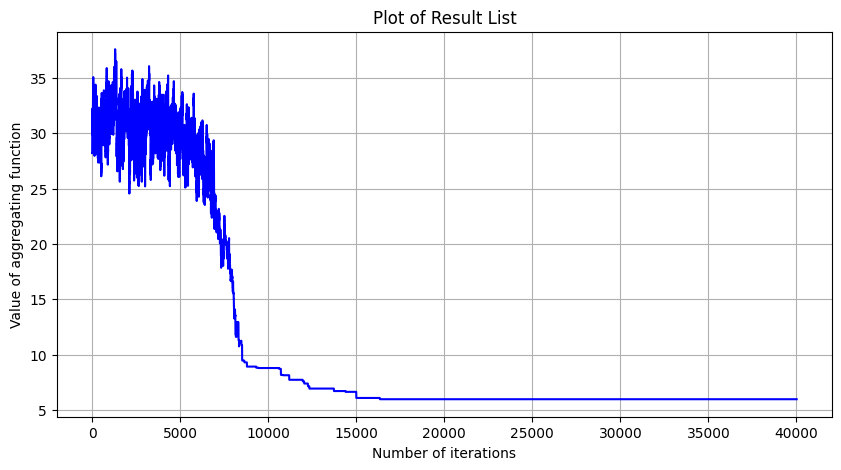

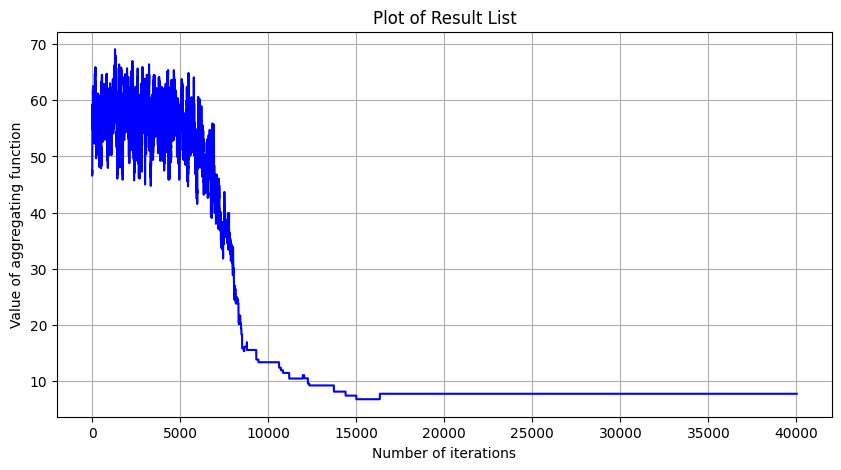

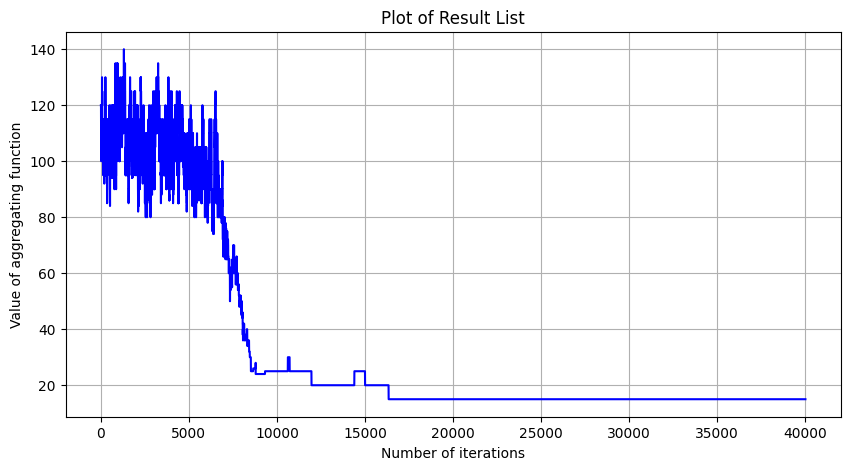

CPU times: total: 33.8 s
Wall time: 33.9 s


In [40]:
%%time

plot_result_list(sol_list,aggregating_function_weightedsum,a,b,E,P,ideal)
plot_result_list(sol_list,aggregating_function_distance,a,b,E,P,ideal)
plot_result_list(sol_list,aggregating_function_weighted_infinite_norm,a,b,E,P,ideal)


In [36]:
generate_timetable(current_sol, b, E, P, num_sessions_per_day=12)

Day 1 Session 1

Student 35 Specialization 2
Student 31 Specialization 2
Student 2 Specialization 2
Student 24 Specialization 2
No allocation
No allocation
Student 12 Specialization 1
Student 19 Specialization 1
Student 26 Specialization 1
Student 29 Specialization 1
Student 21 Specialization 1
Student 10 Specialization 1

Day 1 Session 2

Student 8 Specialization 1
No allocation
No allocation
No allocation
No allocation
No allocation
No allocation
No allocation
Student 15 Specialization 1
Student 11 Specialization 1
Student 16 Specialization 1
Student 17 Specialization 1

Day 2 Session 3

No allocation
No allocation
No allocation
No allocation
No allocation
No allocation
Student 13 Specialization 2
Student 3 Specialization 2
Student 34 Specialization 2
Student 1 Specialization 1
Student 22 Specialization 1
Student 36 Specialization 1

Day 2 Session 4

Student 20 Specialization 2
No allocation
No allocation
No allocation
No allocation
No allocation
Student 7 Specialization 4
Student 27